<a href="https://colab.research.google.com/github/seunghyeon98/KoGpt2-finetuing/blob/main/koGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동화데이터 학습하기
https://velog.io/@yeah7598/KoGPT2-%EB%8F%99%ED%99%94-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0


## 깃 주소
https://github.com/ttop32/KoGPT2novel/blob/main/train.ipynb

In [18]:
!pip install quickspacer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install transformers
!pip install fastai==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-_allxlkd
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-_allxlkd
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done


In [21]:
from typing import Optional
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re
from hanspell import spell_checker

from tqdm import tqdm
from quickspacer import Spacer


In [22]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 

# koGPT2 언어 모델 학습을 위한 gpt2 LMHeadModel 선언
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")
text = """ 옛날 옛날 어느 마을에 흥부와 놀부 형제가 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


옛날 옛날 어느 마을에 흥부와 놀부 형제가 왁자지껄 떠들어대며 "우리 집엔 왜 이렇게 많은 사람들이 모여 사는 거야?" 하고 묻는다.
그런데 그 마을 사람들은 모두 다들 자기네 동네에 살고 있는 사람들이라고 한다.
이렇게 해서 우리 마을은 '흥부가 살던 곳'이라는 뜻의 '고향'이 되었다.
그리고 이 고향은 바로 지금의 서울 종로구 숭인동이다.
숭인동은 원래 종로에서 가장 오래된 주택가였다.
1970년대까지만 해도 이곳은 재개발로 인해 헐리고 빈집이 많아졌다.
하지만 1980년대 들어 다시 활기를 되찾기 시작했다.
당시만 하더라도 이곳에는 낡은 건물들이 많이 남아 있었다.
그러나 1990년대 들어서부터는 예전의


In [23]:
import pandas as pd
data = pd.read_pickle('/content/drive/MyDrive/Kogpt2_리뷰생성/diningcode.pkl')
data

,taste,price,service,reg_review
0,2,2,2,옛날에 와보고 생각나서 다시 방문했습니다 인삼이 통채로 들어가 있어서 좋아요 처음 나오는 인삼주는 뿌려서 먹으면 더 맛있어요
1,1,1,1,논현동 핫한 고기집 워낙 유명한 집이라 월요일 분경 도착했는데 이미 많은 좌석이 찼다 목살과 등갈비 연탄에 구워주는데 당연 맛나다 등갈비 달큰하게 양념이 잘됬다 소주와 맛있는 고기 먹을 만한 곳 외부 주류 반입 안 되고 주변이 너무 시끄러운 것은 단점
2,2,2,2,맛있고 가격도 괜찮아요 여기서만 먹을 수 있는 메뉴들이 있어 좋았어요
3,2,2,2,동생이 추천해서 방문했습니다 일단 인테리어 너무 취향 저격이였어요 딥 그린과 우드의 조화라니 사장님 혼자 계셨는데 안쪽에는 직접 로스팅을 하고 계셨습니다 원두는 두 가지 있는데 제가 마신 거는 고소한 맛이 났습니다 너무 산미있거나 하는 건 별로 안 좋아하는데 약간 과일 향도 있고 커피가 참 맛있었어요 스마트 주문하고 가면 캐쉬백도 되고 테이크아웃이라 그런지 좀 더 저렴했습니다 매장에 자리도 적당히 있어서 코로나만 아니면 카페에서 시간 보내고 싶어요 나만 알고 싶은 카페입니다만 다 코에 올려봅니다 사장님도 친절하시고 원두도 직접 판매하고 있어서 집에서 내려먹어도 될 것 같아요
4,2,2,1,매장 앞 무료 주차 가능키오스크 주문층층으로 좌석 많음
...,...,...,...,...
4923,2,2,2,성수동에 위치한 숨은 카페에요 가게 내부가 넓진 않지만 테이블이 그래도 많은 편이라서 웨이팅은 없이 들어갔어요 커피가 맛있긴 한데 양이 너무 적어요 ㅋㅋㅋ 앙버터랑 버터 프레즐은 버터가 짭쪼롬하니 맛있어요 그리고 여긴 화장실 맛집이에요 화장실이 예뻐요 ㅎㅎ
4924,2,2,1,와우홀릭 세트에 후라이 바스켓을 추가 주문했습니다 떡볶이는 단계로 주문했는데 처음에만 좀 맵고 점점 녹은 치즈에 중화되어서 끝에는 거의 맵지 않았어요 치즈가 토치에 녹여서 나오기 때문에 의외로 불맛이 좀 나는데 안 어울려서 아쉬웠어요 모둠튀김과 갈릭감자는 모두 맛있었습니다 특히 오다리 튀김이 조금 이색적이고 생각보다 야들해서 좋았어요 매장이 작지만 홀포장 배달 회전율이 좋고 서비스도 친절한 편입니다 코로나로 인해 포장 주문 고객에 서비스가 있으니 참고하면 좋을 것 같아요 다음번엔 단계 매운 맛으로 재방문할 의향이 있지만 대기할 정도까진 아닌 것 같습니다
4925,2,2,1,가지 튀김 탕수육과 함께 칭따오 맥주 마셨는데 맛있네요 ㅎㅎ 밑반찬으로 나오는 땅콩도 좋아요
4926,1,1,1,인테리어가 너무 예쁘고 가게에 들어설 때 나는 커피 향이 기분을 들뜨게 만들어요 그런데 커피는 몰라도 디저트류는 잘 모르겠네요 조금 아쉬웠습니다


In [24]:
# 칼럼 이름 수정
data.rename(columns={'reg_review':'review'},inplace=True)

In [25]:
# 한국어 띄어쓰기 교정 모델.
spacer = Spacer(level=3)

lines= []
for i in tqdm(range(len(data))):
  review = data['review'].iloc[i]
  
  # 리뷰의 길이가 10이상인 리뷰만 해당시킵니다.
  if len(review) >= 10 :
    sent = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', ' ', data['review'].iloc[i])
     #spacer 띄어쓰기 검사기
    sen_fix = str(spacer.space([sent])).strip("[""]").strip("'""'")
    lines.append(sen_fix)


100%|██████████| 24642/24642 [01:46<00:00, 232.29it/s]


In [26]:
# 리스트 합치기
lines =",".join(lines)


In [27]:
#model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

# 데이터 학습

to_fp16() : 반정밀 / 메모리 사용량을 줄이기 위한 아이디어 
> https://docs.fast.ai/callback.fp16.html


학습률에 대해
> https://www.kaggle.com/code/sungjunghwan/fast-ai-3-1-v3-lesson-1


# 메모리 문제있을때

In [28]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [29]:
# 파이썬 좀비 프로세스 종료
! ps -ef | grep python

root          57       7  0 04:39 ?        00:00:03 [python3] <defunct>
root          58       7  0 04:39 ?        00:00:00 python3 /usr/local/bin/colab-fileshim.py
root          94       7  0 04:39 ?        00:00:09 /usr/bin/python3 /usr/local/bin/jupyter-notebook --ip=172.28.0.12 --transport=ipc --port=9000 --FileContentsManager.root_dir=/ --MappingKernelManager.root_dir=/content
root        1320       1  0 04:43 ?        00:00:00 bash -c tail -n +0 -F "/root/.config/Google/DriveFS/Logs/drive_fs.txt" | python3 /opt/google/drive/drive-filter.py > "/root/.config/Google/DriveFS/Logs/timeouts.txt" 
root        1323    1320  0 04:43 ?        00:00:00 python3 /opt/google/drive/drive-filter.py
root        6947      94 24 05:05 ?        00:07:48 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-e311b0c7-3c76-4fd8-958c-f5a348307483.json
root        6976       1  0 05:05 ?        00:00:03 /usr/bin/python3 /usr/local/lib/python3.8/dist-packages/debugpy/adapter 

# 학습

fine_tune vs fit_one_cycle 에 대해
https://forums.fast.ai/t/fine-tune-vs-fit-one-cycle/66029/7


fit_one_cycle = 새로운 모델에 대해 사용하는 것 같고 // +@ 이미 잘 학습된 모델에서 fc layer만 학습시키는 함수. ( 전이 학습)
fit_one_cycle 함수를 쓰기 이전에 unfreeze() 를 쓰면, 모든 layer를 학습 시킬수 있음 (시간이 오래걸림)



fine_tune = 전이 학습 포함, 즉 전이 학습 모델에 대해 사용하는 것 같음.
다만 fit_on_cycle도 전이학습 모델에 사용할 순 있음.

fine_tune 메서드에 unfreeze도 포함되어 있어, 
fine_tune을 사용할땐, 따로 unfreeze를 사용하지 않아도 되는것 같다.

fastai 학습률에 관한글

https://github.com/jehyunlee/texts/blob/master/estimating_an_optimal_learning_rate_for_a_deep_neural_network/text.md

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0691830962896347)


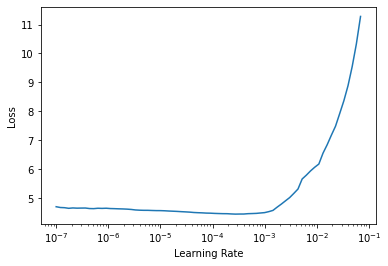

In [30]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
      
      #  내부적으로는 원본 모델의 마지막에 현재 주어진 data의 분류에 알맞는 fully connected layer가 자동으로 추가됨.
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
# 학습률 찾기
lr=learn.lr_find()
print(lr)


# loss 가 감소하는 지점을 찾자.

# 1e-7~1e-3까지 loss가 감소함.

# Train

In [31]:
# loss가 오르는 지점 전 (1e-3)을 학습률로 설정한후 학습진행을 합니다.
learn.fit_one_cycle(3,1e-3)


epoch,train_loss,valid_loss,perplexity,time
0,4.488517,4.402189,81.629379,02:42
1,3.834944,4.019440,55.669907,02:43
2,3.055037,3.887507,48.789089,02:43


# 모델 저장하기

In [32]:
# learn.save('/content/drive/MyDrive/특론 프로젝트/koGPTmodel')
learn.model.save_pretrained('/content/drive/MyDrive/Kogpt2_리뷰생성/koGPTmodel')


# 모델 불러오기

In [ ]:
# learn.load('/content/drive/MyDrive/Kogpt2_리뷰생성/koGPTmodel')

# 학습된 모델 테스트

In [39]:
# 리뷰를 생성하기 위해 제시 문장을 입력합니다.
prompt='음식이 맛있고, 직원분들이 친절합니다'



prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                             
                            #  max_length : 생성 최대 길이
                           #128->64  
                           max_length=64,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=1.5,       
                           use_cache=True
                          ) 

# generate_sen
generate_sen = tokenizer.decode(preds[0].cpu().numpy())


# 네이버에서 배포한 한국어 맞춤범, 띄어쓰기 교정기 hanspell을 통하여 생성된 문장을 교정합니다.
hanspell_sen = spell_checker.check(generate_sen).checked
hanspell_sen

print('생성된 문장:\n',hanspell_sen)


생성된 문장:
 음식이 맛있고, 직원분들이 친절합니다 음식도 빨리 나오고요 ᄒ, 맛있어 요양이 진짜 많아요, 오랜만에 갔는데 여전히 만족스러운 식사였습니다, 주말 점심시간에 방문했는데 웨이팅이 있었어요 근데 기다려서 먹을 만큼은 아닌 것 같아 용 그래도
